In [1]:
#  *          NAME OF THE PROGRAM THIS FILE BELONGS TO
#  *
#  *   file: GraphSparse_Example-karate.ipynb
#  *
#  *    NEC Laboratories Europe GmbH. PROPRIETARY INFORMATION
#  *
#  * This software is supplied under the terms of a license agreement
#  * or nondisclosure agreement with NEC Laboratories Europe GmbH. and 
#  * may not becopied or disclosed except in accordance with the terms of that
#  * agreement. The software and its source code contain valuable 
#  * trade secrets and confidential information which have to be 
#  * maintained in confidence. 
#  * Any unauthorized publication, transfer to third parties or 
#  * duplication of the object or source code - either totally or in 
#  * part - is prohibited. 
#  *

#  *
#  *   Copyright (c) 2022 NEC Laboratories Europe GmbH. All Rights Reserved.
#  *
#  * Authors: Francesco Alesiani  francesco.alesiani@neclab.eu
#  *
#  * 2022 NEC Laboratories Europe GmbH. DISCLAIMS ALL 
#  * WARRANTIES, EITHER EXPRESS OR IMPLIED,
#  * INCLUDING BUT NOT LIMITED TO IMPLIED WARRANTIES OF MERCHANTABILITY
#  * AND FITNESS FOR A PARTICULAR PURPOSE AND THE WARRANTY AGAINST LATENT
#  * DEFECTS, WITH RESPECT TO THE PROGRAM AND THE ACCOMPANYING
#  * DOCUMENTATION.
#  *
#  * No Liability For Consequential Damages IN NO EVENT SHALL 2019 NEC 
#  * Laboratories Europe GmbH, NEC Corporation 
#  * OR ANY OF ITS SUBSIDIARIES BE LIABLE FOR ANY
#  * DAMAGES WHATSOEVER (INCLUDING, WITHOUT LIMITATION, DAMAGES FOR LOSS
#  * OF BUSINESS PROFITS, BUSINESS INTERRUPTION, LOSS OF INFORMATION, OR
#  * OTHER PECUNIARY LOSS AND INDIRECT, CONSEQUENTIAL, INCIDENTAL,
#  * ECONOMIC OR PUNITIVE DAMAGES) ARISING OUT OF THE USE OF OR INABILITY
#  * TO USE THIS PROGRAM, EVEN IF NEC Europe Ltd. HAS BEEN ADVISED OF THE
#  * POSSIBILITY OF SUCH DAMAGES.
#  *
#  *     THIS HEADER MAY NOT BE EXTRACTED OR MODIFIED IN ANY WAY.
#  */

This is an example of the use of the stochastic implementation of the graph sparsification using the gumbel distribution

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import torch

import graph_sparse as sp

In [3]:
G = nx.karate_club_graph()
m, n = G.number_of_edges(), G.number_of_nodes()
print("graph with %d edges and %d nodes"%(m,n))


graph with 78 edges and 34 nodes


Create a test graph

In [4]:
import random
import community as community_louvain
import matplotlib.cm as cm

seed = 10
np.random.seed(seed)
random.seed(seed)



def draw(G, pos, partition, with_labels=True):

        cmap = cm.get_cmap('Set2', max(partition.values()) + 1)
        
        plt.figure(figsize=(8,8))
        nx.draw_networkx(G, pos, nodelist = partition.keys(), cmap=cmap,
                        node_color=list(partition.values()), with_labels=with_labels)
        plt.show()
        

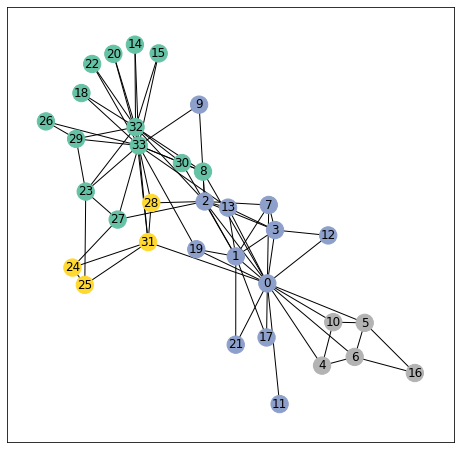

In [5]:
seed = 10
np.random.seed(seed)
random.seed(seed)


partition = community_louvain.best_partition(G, randomize=False)
pos = nx.spring_layout(G)
draw(G,pos, partition, True)


In [6]:
def experimet_vis(G, alpha, beta):

    w,sigma,E,theta,probs,cost_vec,histaory = sp.sparsification_stochastic(G, tau=1, 
                            n_samples=3, epochs=10000, lr=1e-2, 
                            beta=beta, alpha=alpha, loss_type = 'vn', seed=42, 
                            verbose=False,hard=True, plot_flag=False)
    res = sp.get_graph_from_incidence(E, w)
    draw(res, pos, partition, True)
    return res


Res - Edge number: 31


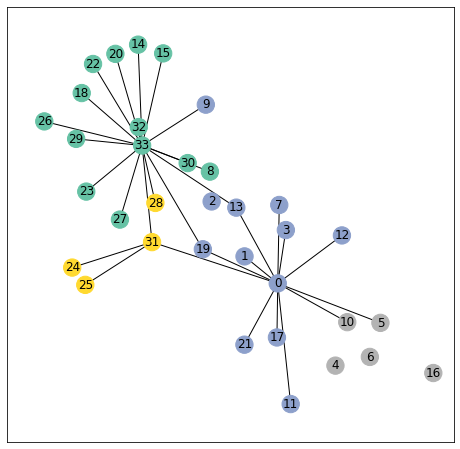

In [16]:
res = experimet_vis(G, alpha=0, beta=0)

Res - Edge number: 55


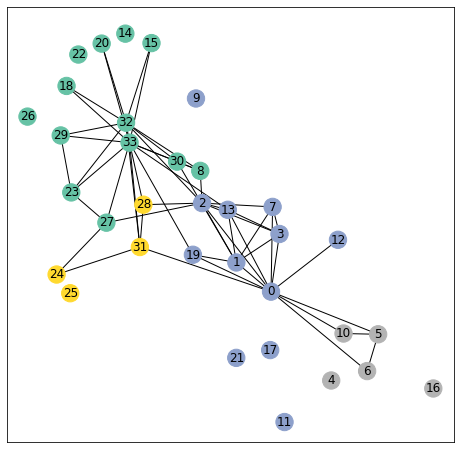

In [25]:
res = experimet_vis(G, alpha=0, beta=2)

Res - Edge number: 64


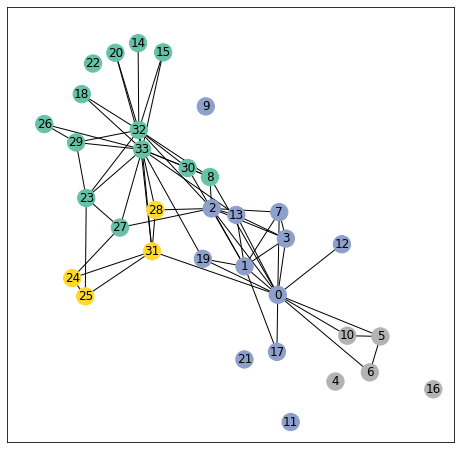

In [21]:
res = experimet_vis(G, alpha=0, beta=5)

Res - Edge number: 69


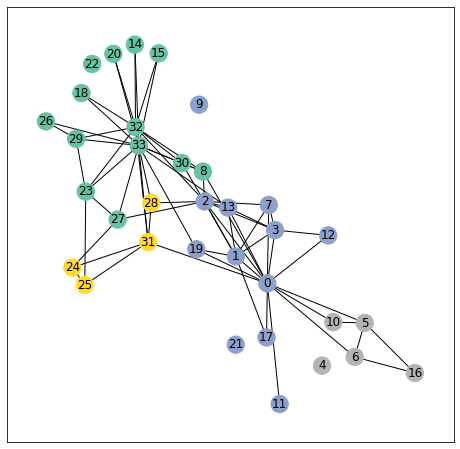

In [22]:
res = experimet_vis(G, alpha=0, beta=1000)

Res - Edge number: 61


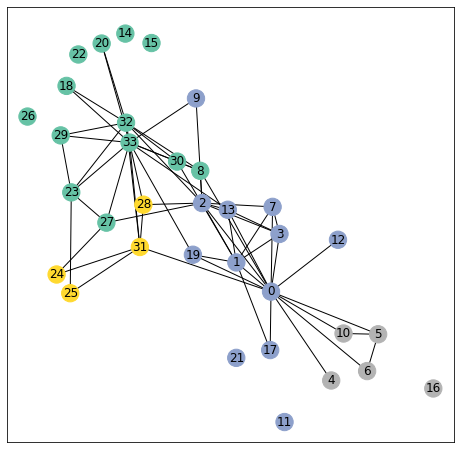

In [26]:
res = experimet_vis(G, alpha=0.001, beta=2)

Res - Edge number: 75


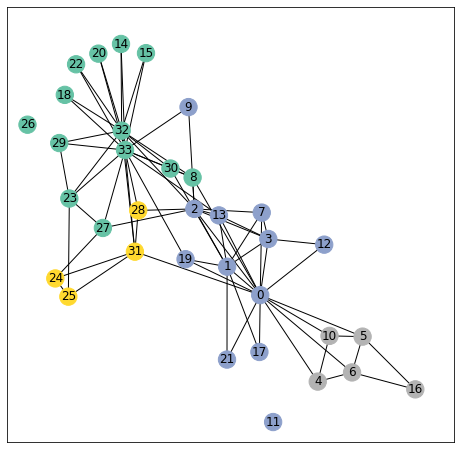

In [24]:
res = experimet_vis(G, alpha=0.001, beta=1000)